In [5]:
import pandas as pd
import numpy as np
import os
import time
from keras.models import Sequential, Model
from keras.layers import Conv1D, Flatten, Dropout, Dense
import matplotlib.pyplot as plt
from utility import read_data,write_result

In [7]:
cwd = os.getcwd()
path = cwd[0:len(cwd)-(len(cwd.split("/")[-1])+len(cwd.split("/")[-2])+1)] + "data/realAdExchange"

In [10]:
data_files = read_data(data_folder_path=cwd[0:len(cwd)-(len(cwd.split("/")[-1])+len(cwd.split("/")[-2])+1)] + "data")

In [11]:
df = pd.read_csv(path+"/exchange-2_cpm_results.csv")
df.head()

,timestamp,value
0,2011-07-01 00:00:01,0.401048
1,2011-07-01 01:00:01,0.392719
2,2011-07-01 02:00:01,0.309996
3,2011-07-01 03:00:01,0.212939
4,2011-07-01 04:00:01,0.205801


In [12]:
df.timestamp = pd.to_datetime(df.timestamp)
df.index = df.timestamp

In [95]:
nb_features = 1
window_size = 10
model = Sequential()
model.add(Conv1D(nb_filter=5, kernel_size=10, input_shape=(windows_size, nb_features), activation='relu'))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()
model.compile(loss='mse', optimizer='adam')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_17 (Conv1D)           (None, 1, 5)              55        
_________________________________________________________________
flatten_7 (Flatten)          (None, 5)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 20)                120       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


/home/abdulliaqat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(kernel_size=10, input_shape=(10, 1), activation="relu", filters=5)`
  after removing the cwd from sys.path.


/home/abdulliaqat/anaconda3/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


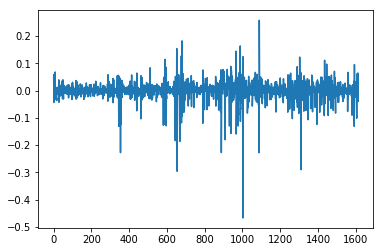

In [119]:
error_prediction = []
for i in np.arange(11,len(df)):
    #i = 11
    L = 10 #window size
    X_input = df["value"].values[i-(1+L):i-1].reshape((1,10,1))
    Y_input = df["value"].values[i].reshape((1,1))
    history = model.fit(X_input,Y_input , nb_epoch=20, verbose=0)
    error_prediction.append((model.predict(X_input)-Y_input)[0][0])
plt.plot(error_prediction)
plt.show()